<center>
    
# **Proyecto de Bases de Programación**

**Link de GITHUB:**

## **Introducción**

Actualmente, el análisis de datos climáticos nos permiten comprender como varían las condiciones atmosféricas en un país o región, por lo cual su estudio, permite la planificación agrícola, gestión de recursos hídricos e inclusive la prevención de desastres naturales. Al estudiar variables como: temperatura, humedad, precipitación o velocidad del viento, nos permite identificar patrones que están relacionadas con el cambio climático o fenómenos locales.

Uno de los beneficios para la comprensión de datos climáticos, es poder analizar datos históricos y actuales, que nos permitan identificar tendencias y patrones, como aumento de temperatura local, o frecuencia de eventos extremos, para la toma de decisiones o medidas de mitigación, a corto o largo plazo.


Al usar herramientas de análisis de datos, nos permite tomar decisiones rápidas y fundamentadas en valores reales y actuales. El proyecto esta fundamentado en automatizar procesos de carga, limpieza y manipulación de datos, mediante una data base, empleando librerías como: Pandas, Numpy, Matplotlib que permitirán la manipulación de datos, y cálculos estadísticos para una interpretación en base a resultados. 


## **Objetivo**

Automatizar el proceso de carga, limpieza, análisis y visualización de un conjunto de datos climáticos mediante el uso de bucles y funciones, para mejorar la eficiencia y la reproducibilidad del análisis de la información.

## **Metodología**

### *1. Carga y preparación de Datos*

Cargaremos las librerias necesarias

In [104]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Crearemos una función para leer cualquier archivo CSV**

In [40]:
def archivo_csv(ruta):
    try:
        archivo = pd.read_csv(ruta)
        return archivo
    except Exception as falla:
        print(f"Error al cargar los datos: {falla}")
        return None

**Importamos el documento csv usando la función creada**

In [41]:
ruta = "C:/Users/USER/Desktop/Maestria/Bases de Programación/Weather_Data.csv" 
archivo_csv = archivo_csv(ruta)
archivo_csv

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,1/14/2024 21:12,10.683001,41.195754,4.020119,8.233540
1,San Diego,5/17/2024 15:22,8.734140,58.319107,9.111623,27.715161
2,San Diego,5/11/2024 9:30,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2/26/2024 17:32,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,4/29/2024 13:23,39.808213,72.899908,9.598282,29.898622
...,...,...,...,...,...,...
999995,Dallas,1/1/2024 20:29,23.416877,37.705024,3.819833,16.538119
999996,San Antonio,1/20/2024 15:59,6.759080,40.731036,8.182785,29.005558
999997,New York,4/14/2024 8:30,15.664465,62.201884,3.987558,0.403909
999998,Chicago,5/12/2024 20:10,18.999994,63.703245,4.294325,6.326036


**Creamos una función para ver la descripción de los datos**

In [35]:
def descripcion(Tabla):
    informacion= Tabla.info()
    nulos=Tabla.isnull().sum()
    return informacion, nulos

In [36]:
informacion,nulos= descripcion(archivo_csv)
informacion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 non-null  float64
 3   Humidity_pct      1000000 non-null  float64
 4   Precipitation_mm  1000000 non-null  float64
 5   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.8+ MB


In [37]:
nulos

Location            0
Date_Time           0
Temperature_C       0
Humidity_pct        0
Precipitation_mm    0
Wind_Speed_kmh      0
dtype: int64

**EL archivo no posee datos o filas con valores nulos, pero las columnas:Location y Date_Time son de tipo object, mientras que las columnas de Temperature_C, Humidity_pct, Precipitation_mm, y Wind_Speed_kmh son de datos flotantes.**

**En Base a las columnas de Object eliminaremos elementos duplicados, mediante una funcion**

In [42]:
def eliminar_duplicados(Tabla, Columnas):
    sin_repetir = Tabla.drop_duplicates(subset=Columnas, ignore_index = True)
    return sin_repetir

archivo_csv = eliminar_duplicados(archivo_csv, ['Location', 'Date_Time'])
archivo_csv

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,1/14/2024 21:12,10.683001,41.195754,4.020119,8.233540
1,San Diego,5/17/2024 15:22,8.734140,58.319107,9.111623,27.715161
2,San Diego,5/11/2024 9:30,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2/26/2024 17:32,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,4/29/2024 13:23,39.808213,72.899908,9.598282,29.898622
...,...,...,...,...,...,...
786464,New York,1/1/2024 11:49,20.245916,31.677558,9.801482,24.029331
786465,New York,2/14/2024 3:55,4.210758,45.683075,2.053384,22.351735
786466,San Jose,1/22/2024 15:43,14.067557,45.668296,0.296306,11.883972
786467,Dallas,1/1/2024 20:29,23.416877,37.705024,3.819833,16.538119


**Presentamos un analisis descriptivo de las columnas numéricas**

In [43]:
archivo_csv.describe()

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
count,786469.000000,786469.000000,786469.000000,786469.000000
mean,14.767244,60.029866,5.107317,15.001548
std,14.484573,17.314466,2.949482,8.662800
min,-19.969311,30.000009,0.000009,0.000051
25%,2.260914,45.041518,2.575863,7.497307
50%,14.759720,60.025753,5.104687,14.997622
75%,27.256960,75.033459,7.613750,22.514125
max,39.999801,89.999977,14.926332,29.999973


### *2. Automatización del análisis exploratorio de datos (EDA)*

Haremos un análisis exploratorio de datos, pero por 'Location'

#### *Promedio*

In [45]:
promedio= archivo_csv.groupby('Location')[['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']].mean()
promedio

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
Location,,,,
Chicago,15.045266,60.119513,5.001286,15.004210
Dallas,14.973336,59.958284,4.994068,15.038196
Houston,14.893002,60.011898,5.002750,14.989573
Los Angeles,15.121807,60.069462,4.998814,15.038213
New York,14.997349,60.090206,4.989633,15.008664
Philadelphia,14.985475,60.029258,5.004499,14.978270
Phoenix,12.758808,60.079766,6.091727,14.974672
San Antonio,15.037004,59.940972,5.002635,14.967463
San Diego,14.917072,60.060558,5.005491,15.043758


#### *Mínimo*

In [46]:
minimo= archivo_csv.groupby('Location')[['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']].min()
minimo

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
Location,,,,
Chicago,-9.999959,30.001637,0.000118,0.000171
Dallas,-9.999588,30.000572,0.000328,0.000342
Houston,-9.999874,30.000734,0.000010,0.000119
Los Angeles,-9.999913,30.000223,0.000167,0.000173
New York,-9.999870,30.001079,0.000331,0.000465
Philadelphia,-9.999282,30.000009,0.000454,0.000272
Phoenix,-19.969311,30.002950,0.000254,0.000833
San Antonio,-9.999964,30.000028,0.000149,0.000654
San Diego,-9.999986,30.001620,0.000177,0.000716


**Podemos darnos cuenta de que Phoenix presenta un error debido a que su minima temperatura es de -19.96 algo que no se ha dado en la historia en esa ciudad**

#### *Maximo*

In [47]:
maximo= archivo_csv.groupby('Location')[['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']].max()
maximo

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
Location,,,,
Chicago,39.998561,89.998857,9.999889,29.999889
Dallas,39.998804,89.999929,9.999832,29.999971
Houston,39.998913,89.999082,9.999921,29.999948
Los Angeles,39.999592,89.998014,9.999522,29.999757
New York,39.999801,89.998328,9.999992,29.999681
Philadelphia,39.999642,89.999036,9.999944,29.999973
Phoenix,39.998889,89.999666,14.926332,29.999392
San Antonio,39.998314,89.999637,9.999734,29.999800
San Diego,39.999692,89.998038,9.999716,29.998855


Crearemos una funcion para imprimir los resultados maximos y minimos, de cada columna.

In [51]:
def imprimir_extremos(Tabla, columnas, decimales=4):
    for col in columnas:
        max_val = Tabla[col].max()
        min_val = Tabla[col].min()

        ciudad_max = Tabla[Tabla[col] == max_val].index[0]
        ciudad_min = Tabla[Tabla[col] == min_val].index[0]

        print(f" Máxima {col}: {round(max_val, decimales)} en {ciudad_max}")
        print(f" Mínima {col}: {round(min_val, decimales)} en {ciudad_min}")

columnas = ['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']
imprimir_extremos(maximo, columnas, decimales=4)

 Máxima Temperature_C: 39.9998 en New York
 Mínima Temperature_C: 39.9975 en San Jose
 Máxima Humidity_pct: 90.0 en San Jose
 Mínima Humidity_pct: 89.998 en Los Angeles
 Máxima Precipitation_mm: 14.9263 en Phoenix
 Mínima Precipitation_mm: 9.9995 en Los Angeles
 Máxima Wind_Speed_kmh: 30.0 en Philadelphia
 Mínima Wind_Speed_kmh: 29.9989 en San Diego


**Extraemos los meses, días y año del dataframe y lo agregaremos como columnas separadas**

**Primero transformamos la fecha que esta en string en formato fecha y extraemos la infromacion y agregamos como columnas independientes**

In [56]:
archivo_csv.loc[:, 'Date_Time'] = pd.to_datetime(archivo_csv['Date_Time'])
archivo_csv.loc[:,'Año'] = archivo_csv['Date_Time'].dt.year
archivo_csv.loc[:,'Mes'] = archivo_csv['Date_Time'].dt.month
archivo_csv.loc[:,'Día'] = archivo_csv['Date_Time'].dt.day
archivo_csv

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Año,Mes,Día
0,San Diego,2024-01-14 21:12:00,10.683001,41.195754,4.020119,8.233540,2024,1,14
1,San Diego,2024-05-17 15:22:00,8.734140,58.319107,9.111623,27.715161,2024,5,17
2,San Diego,2024-05-11 09:30:00,11.632436,38.820175,4.607511,28.732951,2024,5,11
3,Philadelphia,2024-02-26 17:32:00,-8.628976,54.074474,3.183720,26.367303,2024,2,26
4,San Antonio,2024-04-29 13:23:00,39.808213,72.899908,9.598282,29.898622,2024,4,29
...,...,...,...,...,...,...,...,...,...
786464,New York,2024-01-01 11:49:00,20.245916,31.677558,9.801482,24.029331,2024,1,1
786465,New York,2024-02-14 03:55:00,4.210758,45.683075,2.053384,22.351735,2024,2,14
786466,San Jose,2024-01-22 15:43:00,14.067557,45.668296,0.296306,11.883972,2024,1,22
786467,Dallas,2024-01-01 20:29:00,23.416877,37.705024,3.819833,16.538119,2024,1,1


**Encontrar el mes con la temperatura mas alta**

In [62]:
meses=['Enero','Febrero','Marzo','Abril', 'Mayo', 'Junio','Julio','Agosto','Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
mes_max_temp = archivo_csv.groupby('Mes')['Temperature_C'].mean().idxmax()
temp_promedio = archivo_csv.groupby('Mes')['Temperature_C'].mean().max()
datos_mes_max = archivo_csv[archivo_csv['Mes'] == mes_max_temp]
ciudad_max_temp = datos_mes_max.loc[datos_mes_max['Temperature_C'].idxmax(), 'Location']

print(f" El mes con la temperatura promedio más alta es {meses[mes_max_temp-1]} con {round(temp_promedio, 4)}°C en la ciudad de {ciudad_max_temp}")

 El mes con la temperatura promedio más alta es Mayo con 15.0215°C en la ciudad de New York


**Encontrar el año con mas precipitaciones**

In [65]:
precipi_año = archivo_csv.groupby('Año')['Precipitation_mm'].sum()
año_max_precipi = precipi_año.idxmax()
prec_total = precipi_año.max()

datos_año_max = archivo_csv[archivo_csv['Año'] == año_max_precipi]


print(f" El año con más precipitaciones fue {año_max_precipi} con {round(prec_total, 3)} mm")

 El año con más precipitaciones fue 2024 con 4016746.8 mm


**La ciudad que tenga las velocidades de viento más altas**

In [69]:
viento_prom = archivo_csv.groupby('Location')['Wind_Speed_kmh'].max()

ciudad_viento_max = viento_prom.idxmax()
velocidad_max = viento_prom.max()

print(f" La ciudad con mayor velocidad de viento es {ciudad_viento_max} con {round(velocidad_max, 4)} km/h")

 La ciudad con mayor velocidad de viento es Philadelphia con 30.0 km/h


### **Manipulación de Datos con Pandas**

#### **Calcular la sensacion termica**

La fórmula para calcular la **sensación térmica (ST)** en °C es:

$$
ST = T + 0.33 \cdot RH - 0.70 \cdot V - 4.00
$$

Donde:
- \( T \) es la temperatura en °C  
- \( RH \) es la humedad relativa (%)  
- \( V \) es la velocidad del viento (m/s)


In [77]:
def calcular_sensaciontermica(row):
    TC = row['Temperature_C']
    RH = row['Humidity_pct']
    VL = row['Wind_Speed_kmh']

    sensacion_termica = TC+ 0.33*(RH)-0.70*(VL)-4.00

    return sensacion_termica

archivo_csv.loc[:,'Sensacion_Termica_C'] = archivo_csv.apply(calcular_sensaciontermica, axis=1)
archivo_csv


,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Año,Mes,Día,Sensacion_Termica_C
0,San Diego,2024-01-14 21:12:00,10.683001,41.195754,4.020119,8.233540,2024,1,14,14.514122
1,San Diego,2024-05-17 15:22:00,8.734140,58.319107,9.111623,27.715161,2024,5,17,4.578832
2,San Diego,2024-05-11 09:30:00,11.632436,38.820175,4.607511,28.732951,2024,5,11,0.330028
3,Philadelphia,2024-02-26 17:32:00,-8.628976,54.074474,3.183720,26.367303,2024,2,26,-13.241511
4,San Antonio,2024-04-29 13:23:00,39.808213,72.899908,9.598282,29.898622,2024,4,29,38.936147
...,...,...,...,...,...,...,...,...,...,...
786464,New York,2024-01-01 11:49:00,20.245916,31.677558,9.801482,24.029331,2024,1,1,9.878978
786465,New York,2024-02-14 03:55:00,4.210758,45.683075,2.053384,22.351735,2024,2,14,-0.360041
786466,San Jose,2024-01-22 15:43:00,14.067557,45.668296,0.296306,11.883972,2024,1,22,16.819314
786467,Dallas,2024-01-01 20:29:00,23.416877,37.705024,3.819833,16.538119,2024,1,1,20.282852


## **Guardar el DataFrame modificado como archivo Excel**

In [79]:
archivo_csv.to_excel('Weather_Data_modificadoKF.xlsx')

### *4.Visualización de Datos*

**Realizaremos un diagrama de Caja de Sensacion Termica**

In [101]:
def Diagrama_caja(Tabla, ciudad_col='Location', sensacion_col='Sensacion_Termica_C'):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=ciudad_col, y=sensacion_col, data=Tabla)
    plt.title("Diagrama de caja: Sensación térmica por ciudad")
    plt.xlabel("Location")
    plt.ylabel("Sensación térmica (°C)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

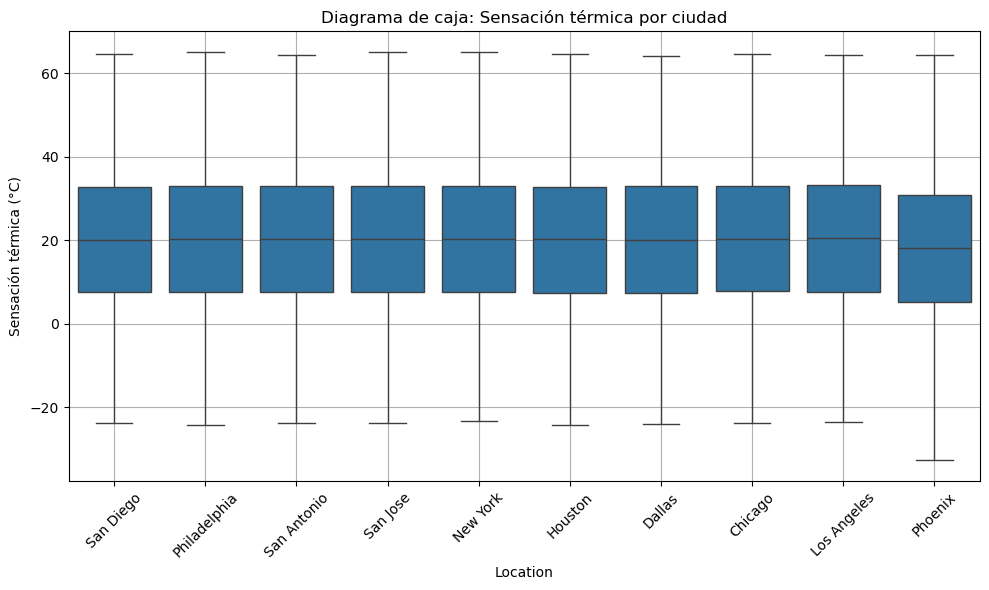

In [102]:
Diagrama_caja(archivo_csv)

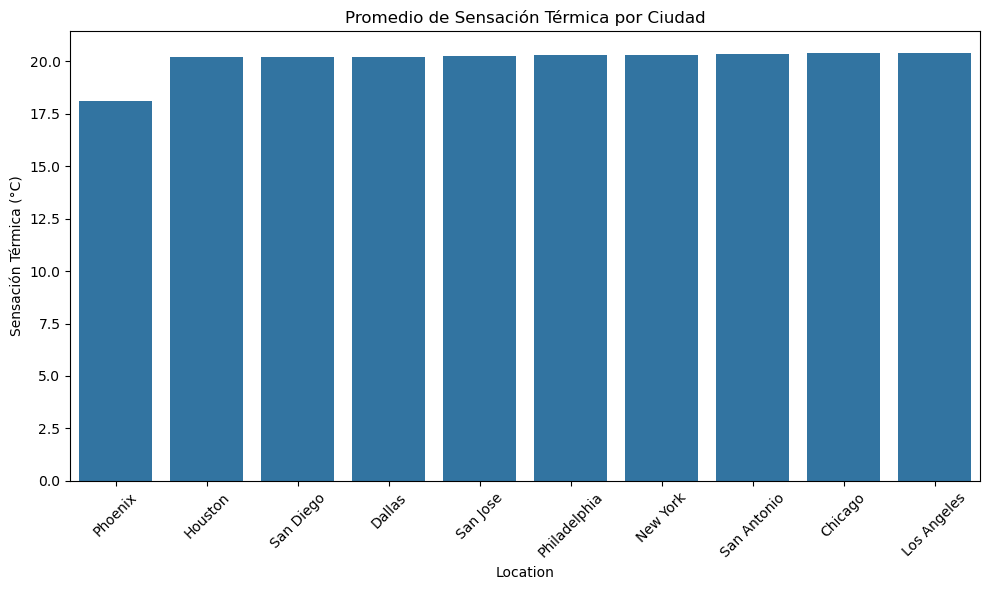

In [106]:
def grafico_barras_sensacion_por_ciudad(Tabla, ciudad_col='Location', sensacion_col='Sensacion_Termica_C'):
    plt.figure(figsize=(10, 6))
    promedio = Tabla.groupby(ciudad_col)[sensacion_col].mean().sort_values()
    
    sns.barplot(x=promedio.index, y=promedio.values)
    plt.title("Promedio de Sensación Térmica por Ciudad")
    plt.xlabel("Location")
    plt.ylabel("Sensación Térmica (°C)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

grafico_barras_sensacion_por_ciudad(archivo_csv)

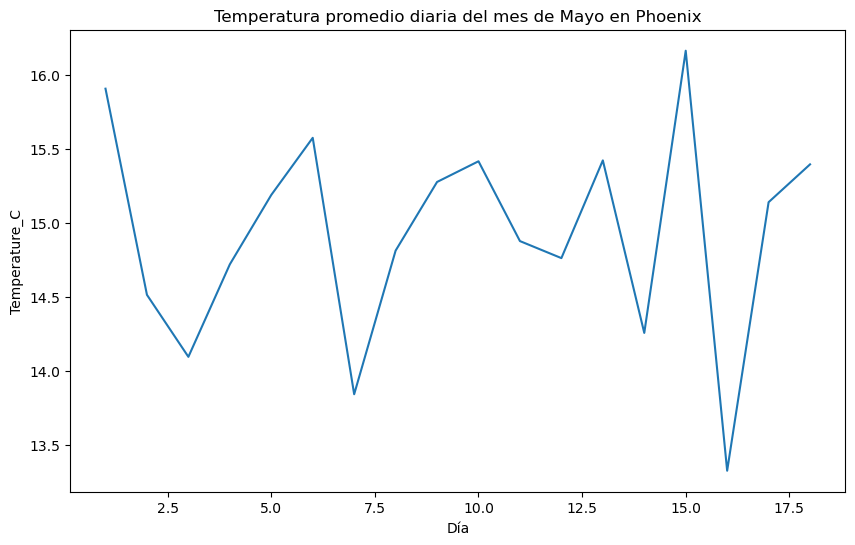

In [134]:
Datos = archivo_csv.groupby(['Location','Mes', 'Día'])['Temperature_C'].mean().reset_index()
Datos = Datos.loc[((Datos.Location == 'Phoenix') & (Datos.Mes == 5)),:].reset_index(drop = True)
Datos
y1 = Datos.Temperature_C
x1 = Datos.Día

fig, ax = plt.subplots(figsize= (10,6))
sns.lineplot(data=Datos, x=x1, y=y1 )
plt.title("Temperatura promedio diaria del mes de Mayo en Phoenix")

plt.show()


### **5. Conclusiones**

En base al trabajo se ejecutaron funciones de Numpy para realizar la limpieza de datos y exportación de la base de datos, el numero inicial de datos eran 10000 filas x 6 columnas, mientras que posterior a la limpieza y eliminación de datos duplicados fueron de 786469 rows × 6 columns.


Mediante un análisis específico de la manipulación de datos se obtuvieron los siguientes resultados:


•	Máxima Temperature_C: 39.9998 en New York


•	Mínima Temperature_C: 39.9975 en San Jose


•	Máxima Humidity_pct: 90.0 en San Jose


•	Mínima Humidity_pct: 89.998 en Los Angeles


•	Máxima Precipitation_mm: 14.9263 en Phoenix


•	Mínima Precipitation_mm: 9.9995 en Los Angeles


•	Máxima Wind_Speed_kmh: 30.0 en Philadelphia


•	Mínima Wind_Speed_kmh: 29.9989 en San Diego


Se aplico la fórmula de sensación térmica que involucraba temperatura, humedad y velocidad de viento, obteniendo un promedio de 20 °C para todas las ciudades excepto Phoenix, este dato sirve para mostrar el grado que percibe realmente el cuerpo humano la temperatura ambiente.


### **6. Recomendaciones**

Antes de proceder con el análisis, se recomienda realizar una exploración exhaustiva de la base de datos climáticos con el fin de detectar posibles inconsistencias o errores en la toma de datos. Por ejemplo, en algunos registros se identifican valores atípicos que podrían deberse a errores de medición o digitación, como el caso de la ciudad de Phoenix, que presento una temperatura mínima de -19.96 °C, un valor poco probable dadas sus condiciones climáticas normales. 

Se recomienda incorporar validaciones dentro de las funciones desarrolladas con el objetivo de evitar errores durante la ejecución del programa y garantizar su robustez. Estas validaciones permiten comprobar, por ejemplo, si el archivo existe, si contiene datos válidos o si las columnas necesarias están presentes. Al incluir estos controles, el código no solo se vuelve más estable, sino también reutilizable y adaptable a diferentes tipos de análisis.

### **7. Referencias**

Calculadora Online - Cómo calcular sensación térmica. (n.d.). Retrieved June 23, 2025, from https://oroel.com/ayuda-y-consejos/como-calcular-la-sensacion-termica/


El infierno está en Phoenix: la ciudad bate el récord de 19 días con temperaturas por encima de los 43 grados | Clima y Medio Ambiente | EL PAÍS. (n.d.). Retrieved June 23, 2025, from https://elpais.com/clima-y-medio-ambiente/2023-07-18/el-infierno-esta-en-phoenix-la-ciudad-bate-el-record-de-19-dias-con-temperaturas-por-encima-de-los-43-grados.html


¿Qué significa la sensación térmica? ¿Por qué es importante? (n.d.). Retrieved June 23, 2025, from https://tempest.earth/resources/what-does-feels-like-temperature-mean/


seaborn: statistical data visualization — seaborn 0.13.2 documentation. (n.d.). Retrieved June 23, 2025, from https://seaborn.pydata.org/


Waskom, M. (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021. https://doi.org/10.21105/JOSS.03021


Pandas Development Team. (2024). Pandas documentation. Pandas. Retrieved April, 2024, from https://pandas.pydata.org/docs/
